# 따라하며 배우는 파이썬과 데이터 과학 2/e
# 07. 딥러닝을 시작합니다.

## 07-1 인공 신경망

* ### 패션 MNIST 데이터 *준비하기*

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


몇 개의 샘플을 그림으로 출력하기

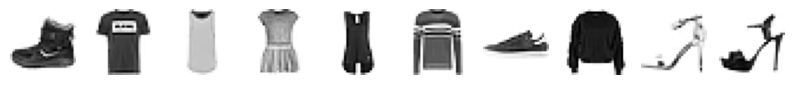

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'Greys')
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


레이블  0(티셔츠), 1(바지), 2(스웨터), 3(드레스), 4(코트), 5(샌달), 6(셔츠), 7(스니커즈), 8(가방), 9(앵글부츠)


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


---
* ###  로지스틱 회귀로 패션 아이템 분류하기
---



* 정규화

In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


* SGDClassifier 클래스와 cross_validate 함수로 교차 검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)

In [ ]:
print(np.mean(scores['test_score']))

0.8196000000000001


* ### 인공 신경망으로 모델 만들기 (tensorflow & Keras)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [ ]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


1.   층 만들기: 밀집층(dense layer)

In [ ]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))
#dense = keras.layers.Dense(10, activation = 'softmax')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




2.   모델 만들기



In [ ]:
model = keras.Sequential([dense])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

3. 모델 설정하기

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


4. 데이터 훈련하기

In [ ]:
model.fit(train_scaled, train_target, epochs=5)
history = model.fit(train_scaled, train_target, epochs=5,
                    validation_data = (val_scaled, val_target))


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8586 - loss: 0.4162
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8568 - loss: 0.4216
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8590 - loss: 0.4181
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8601 - loss: 0.4071
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8639 - loss: 0.4042
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8628 - loss: 0.4043 - val_accuracy: 0.8477 - val_loss: 0.4474
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8648 - loss: 0.4038 - val_accuracy: 0.8565 - val_loss: 0.4333
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8610 - loss: 0.4121 - val_accuracy: 0.8457 - val_loss: 0.4497
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8659 - loss: 0.4018 - val_accuracy: 0.8493 - val_loss: 0.4415
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/s

5. 모델 성능 검증하기

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8533 - loss: 0.4296


[0.4375346302986145, 0.8535000085830688]

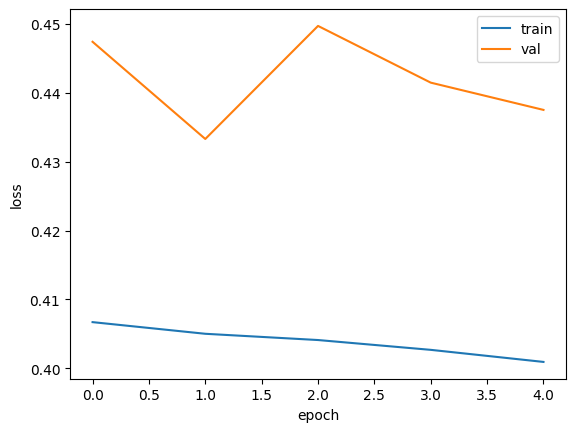

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

==> Tensorflow, Keras를 이용한 인공신경망 모델로 성능 향상

---
## 07-2 심층 신경망
---

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

* ### 2개의 층: 은익층, 출력층

### 심층 신경망 만들기 3가지

1) 층을 정의한 후 모델 정의



In [ ]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

2) 모델을 정의할 때 같이 층을 정의하기

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,),
                       name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = '패션 MNIST 모델')

In [ ]:
model.summary()

3) 모델을 정의하고 층을 add()로 추가하기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax',))

In [ ]:
model.summary()

* 모델 훈련하기

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5


ValueError: '패션 MNIST 모델_패션MNIST모델_fashion_MNIST_sequential_4_dense_12_kernel_velocity' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$

## 07-3 신경망 모델 훈련

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 2,
                    validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 - 4s - 2ms/step - accuracy: 0.9078 - loss: 0.2664 - val_accuracy: 0.8803 - val_loss: 0.3754
Epoch 2/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9091 - loss: 0.2593 - val_accuracy: 0.8842 - val_loss: 0.3904
Epoch 3/20
1500/1500 - 4s - 3ms/step - accuracy: 0.9104 - loss: 0.2542 - val_accuracy: 0.8850 - val_loss: 0.3911
Epoch 4/20
1500/1500 - 4s - 3ms/step - accuracy: 0.9132 - loss: 0.2508 - val_accuracy: 0.8829 - val_loss: 0.3811
Epoch 5/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9155 - loss: 0.2448 - val_accuracy: 0.8858 - val_loss: 0.3828
Epoch 6/20
1500/1500 - 4s - 3ms/step - accuracy: 0.9184 - loss: 0.2382 - val_accuracy: 0.8828 - val_loss: 0.4052
Epoch 7/20
1500/1500 - 6s - 4ms/step - accuracy: 0.9175 - loss: 0.2368 - val_accuracy: 0.8808 - val_loss: 0.3966
Epoch 8/20
1500/1500 - 4s - 2ms/step - accuracy: 0.9209 - loss: 0.2320 - val_accuracy: 0.8821 - val_loss: 0.4057
Epoch 9/20
1500/1500 - 4s - 3ms/step - accuracy: 0.9214 - loss: 0.2275 - val_accuracy: 0.8856 - 

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


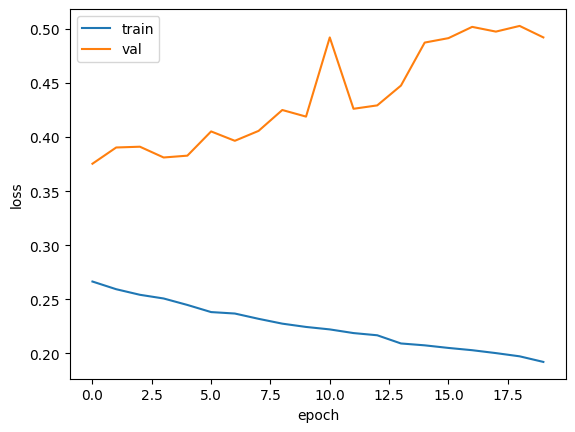

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8177 - loss: 0.5210 - val_accuracy: 0.8483 - val_loss: 0.4246
Epoch 2/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8579 - loss: 0.3950 - val_accuracy: 0.8567 - val_loss: 0.3965
Epoch 3/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8691 - loss: 0.3562 - val_accuracy: 0.8683 - val_loss: 0.3635
Epoch 4/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8792 - loss: 0.3290 - val_accuracy: 0.8648 - val_loss: 0.3733
Epoch 5/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8860 - loss: 0.3079 - val_accuracy: 0.8752 - val_loss: 0.3482
Epoch 6/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8905 - loss: 0.2938 - val_accuracy: 0.8846 - val_loss: 0.3162
Epoch 7/20
1500/1500 - 7s - 4ms/step - accuracy: 0.8965 - loss: 0.2779 - val_accuracy: 0.8822 - val_loss: 0.3264
Epoch 8/20
1500/1500 - 5s - 3ms/step - accuracy: 0.9010 - loss: 0.2667 - val_accuracy: 0.8831 - val_loss: 0.3306
Epoch 9/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9038 - loss: 0.2582 - val_accuracy: 0.8869 - 

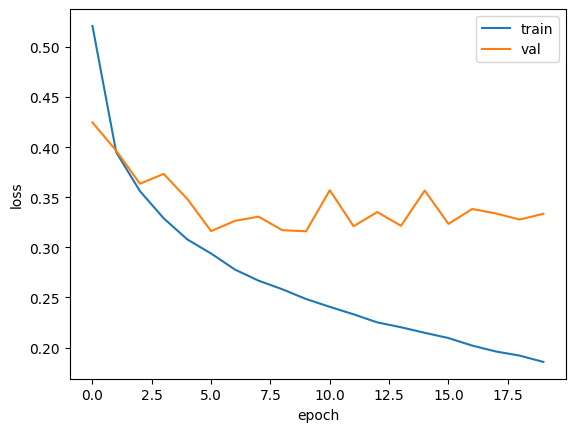

In [ ]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 2,
                    validation_data = (val_scaled, val_target))
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

### 드롭아웃(dropout)

드롭아웃은 왜 과대적합을 막을까요? 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 합니다.

*   드롭아웃 30%를 이용한 과대 적합 줄이기: 케라스의 Dropout()층을 추가한다.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 - 4s - 3ms/step - accuracy: 0.7932 - loss: 0.5857 - val_accuracy: 0.8394 - val_loss: 0.4414
Epoch 2/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8414 - loss: 0.4350 - val_accuracy: 0.8546 - val_loss: 0.3935
Epoch 3/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8528 - loss: 0.4007 - val_accuracy: 0.8704 - val_loss: 0.3550
Epoch 4/20
1500/1500 - 5s - 4ms/step - accuracy: 0.8606 - loss: 0.3793 - val_accuracy: 0.8683 - val_loss: 0.3553
Epoch 5/20
1500/1500 - 5s - 4ms/step - accuracy: 0.8655 - loss: 0.3638 - val_accuracy: 0.8717 - val_loss: 0.3525
Epoch 6/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8698 - loss: 0.3535 - val_accuracy: 0.8784 - val_loss: 0.3380
Epoch 7/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8757 - loss: 0.3413 - val_accuracy: 0.8775 - val_loss: 0.3366
Epoch 8/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8755 - loss: 0.3354 - val_accuracy: 0.8774 - val_loss: 0.3336
Epoch 9/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8783 - loss: 0.3253 - val_accuracy: 0.8786 - 

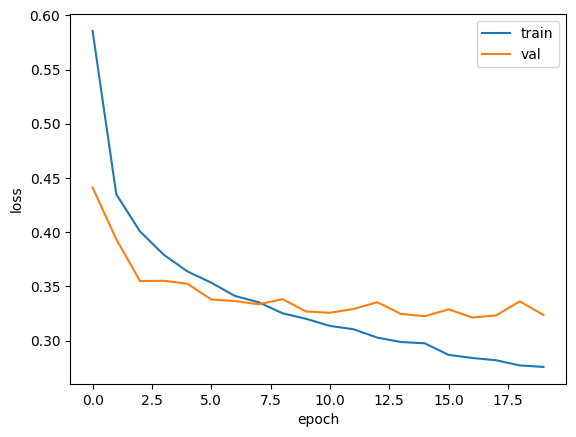

In [ ]:
dropout = keras.layers.Dropout(0.3)
model = model_fn(dropout)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 2,
                    validation_data = (val_scaled, val_target))
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

### 모델 저장과 복원

# 15. 딥러닝의 맛을 *보자*

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


## 15.6 MNIST라는 예시 데이터를 살펴보자
---

*   항목 추가
*   항목 추가



In [ ]:
# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
#fashion_mnist = keras.datasets.fashion_mnist
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('train_image.shape:', train_images.shape)
print('train_labels.shape:', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)

train_image.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


In [ ]:
img = train_images[50]
for i in range(28):
  for j in range(28):
    #print(f'{img[i][j]:4d}', end='')
    if img[i][j] > 0:
      print('##', end='')
    else:
      print('. ', end='')
  print()

. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . ################. . . . . . . . . . 
. . . . . . . . ####################. . . . . . . . . . 
. . . . . . . . ####################. . . . . . . . . . 
. . . . . . . . ##. . . . . . . ######. . . . . . . . . 
. . . . . . . . . . . . . . . ########. . . . . . . . . 
. . . . . . . . . . . . . . ########. . . . . . . . . . 
. . . . . . . . . . . . . ########. . . . . . . . . . . 
. . . . . . . . . . . ################. . . . . . . . . 
. . . . . . . . . . ##################. . . . . . . . . 
. . . . . . . . . . ####################. . . . . . . . 
. . . . . . . . . . . . . . . . . . ####. . . . . . . . 
. . . . . . . . . . . . . . . . . . ####. . . . . . . . 
. . . . . . . . . . . . . . . . . . ######. . . . . . . 
. . . . . . . . . . . . . . . .

##15.7 MNIST 데이터와 이미지 구조
---

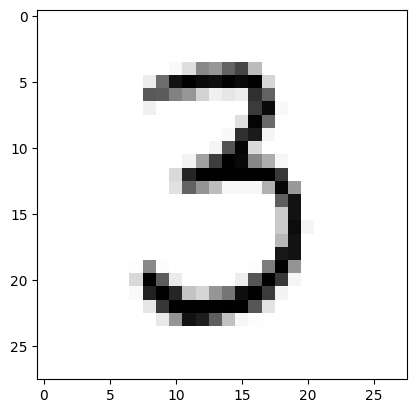

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[50], cmap = 'Greys')

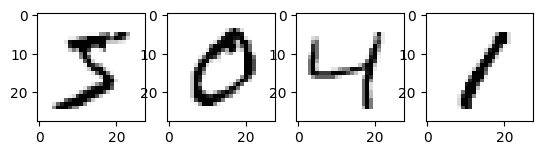

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap = 'Greys')
ax2.imshow(train_images[1], cmap = 'Greys')
ax3.imshow(train_images[2], cmap = 'Greys')
ax4.imshow(train_images[3], cmap = 'Greys')

In [ ]:
print('train_labels[:4] =', train_labels[:4])

train_labels[:4] = [5 0 4 1]


## 15.8 딥러닝 모델을 만드는 단계
---**굵은 텍스트**

### 1. 단계: 전처리

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0  # 0 ~ 255 ==> 0 ~ 1 (정규화)

###2. 신경망 모델 만들기

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')  # 출력 강도를 정규화 한다. (확률 표현)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

* 100,480 = (28 * 28) * 128 + 128 = 784 * 128 + 128
* 1,290 = 128 * 10 + 10

###3. 학습을 위한 활성화 함수, 최적화 함수, 측정 방법 정의
---

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

---
**> 학습한 모델을 저장하고 그 저장된 모델로 예측하기 <**
---

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('mnist-best-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                  restore_best_weights = True)

###4. 학습시키기
---
history에 학습 과정에서 정확도, 손실 등에 관한 정보 저장

In [ ]:
history = model.fit(train_images, train_labels, epochs = 5,
          validation_data = (test_images, test_labels),
          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9899 - loss: 0.0338 - val_accuracy: 0.9736 - val_loss: 0.0812
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9919 - loss: 0.0271 - val_accuracy: 0.9783 - val_loss: 0.0742
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9939 - loss: 0.0214 - val_accuracy: 0.9782 - val_loss: 0.0754
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9950 - loss: 0.0179 - val_accuracy: 0.9757 - val_loss: 0.0844


###5. 저장된 모델을 읽어와 정확도 알아보기
---

In [ ]:
model = keras.models.load_model('mnist-best-model.keras')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('데스트 데이터에 대한 모델 정확도 test_acc:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9757 - loss: 0.0844
데스트 데이터에 대한 모델 정확도 test_acc: 0.9757000207901001


## 15.10 이미지를 예측해 보자

In [ ]:
test_images.shape # 이미지 데이터 크기 확인

(10000, 28, 28)

In [ ]:
type(test_images)

numpy.ndarray

* ##### 5개의 데이터와 레이블을 화면에 표시하고 확인

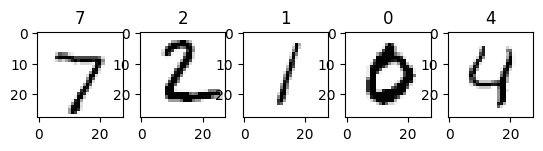

In [ ]:
fig = plt.figure()

n = 5
for i in range(n):
  ax = fig.add_subplot(1, n, i + 1)
  ax.imshow(test_images[i], cmap = 'Greys')
  ax.set_title(f'{test_labels[i]}')

* ##### model의 predict()를 이용하여 예측하기

In [ ]:
yhat = model.predict(test_images[0])

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
test_images[0].shape

(28, 28)

In [ ]:
test_images[0][np.newaxis, :, :].shape  # [28, 28] --> [1, 28, 28] 로 변환

(1, 28, 28)

In [ ]:
model.predict(test_images[0][np.newaxis, :, :]) # softmax에 의해서 각 레이블에 대한 확률값을 출력

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[1.3478181e-07, 1.4932523e-09, 1.1541889e-05, 3.5529283e-05,
        1.6525099e-10, 9.3296508e-09, 4.2739388e-11, 9.9993718e-01,
        2.0783601e-07, 1.5384379e-05]], dtype=float32)

* ##### softmax의 결과 중에서 최대값을 np.argmax()로 구하기

In [ ]:
for i in range(5):
  y_pred = np.argmax(model.predict(test_images[i][np.newaxis, :, :]))
  print(f'예측값: {y_pred}, 실제값: {test_labels[i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
예측값: 7, 실제값: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
예측값: 2, 실제값: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
예측값: 1, 실제값: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
예측값: 0, 실제값: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
예측값: 4, 실제값: 4


* 훈련 손실과 검증 손실을 출력해서 확인하기

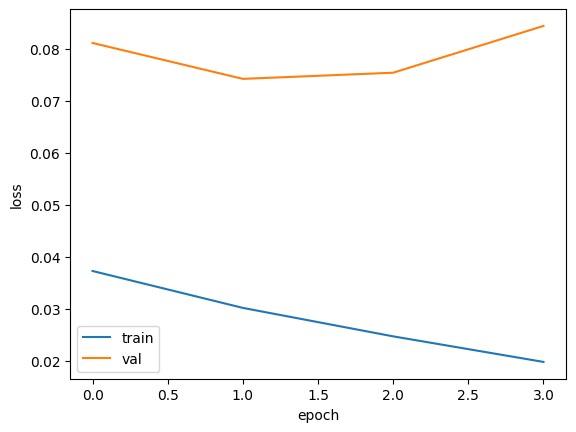

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()